In [34]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn import tree
import graphviz
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
celular = pd.read_csv("Data/Celular.csv")

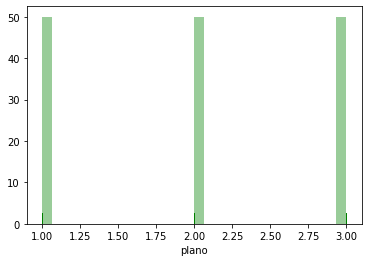

In [3]:
ax = sns.distplot(celular["plano"], bins=30, kde = False, color='g', rug=True)
ax=ax

In [64]:
#treino
X= celular.iloc[:,:-1].values
y=celular.iloc[:,4].values

In [5]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [6]:
#Arvores de decisão
classificador_arvore = tree.DecisionTreeClassifier()
classificador_arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
dot_data = tree.export_graphviz(classificador_arvore, filled=True, out_file=None)
graph = graphviz.Source(dot_data)

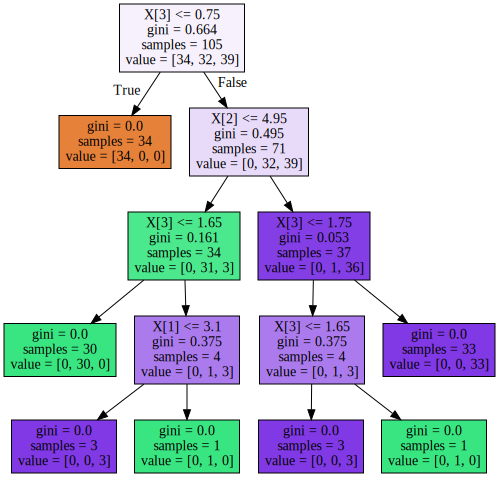

In [8]:
graph

In [9]:
plano_previsto = classificador_arvore.predict(x_teste)

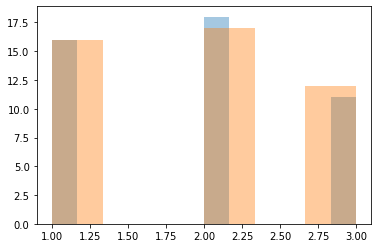

In [11]:
sns.distplot(y_teste, bins=12, kde=False)
sns.distplot(plano_previsto, bins=6, kde=False)

In [17]:
accuracy_score(y_teste , plano_previsto)*100

97.77777777777777

In [20]:
#K Vizinhos mais proximos
classificador_vizinho = KNeighborsClassifier(5)

In [21]:
classificador_vizinho.fit(x_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
plano_previsto_v = classificador_vizinho.predict(x_teste)

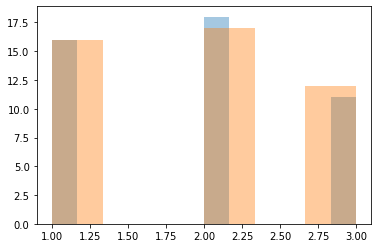

In [24]:
sns.distplot(y_teste, bins=12, kde=False)
sns.distplot(plano_previsto_v, bins=6, kde=False)

In [25]:
accuracy_score(y_teste , plano_previsto_v)*100

97.77777777777777

In [26]:
plano_previsto_v2 = classificador_vizinho.predict(x_treino)

In [27]:
accuracy_score(y_treino , plano_previsto_v2)*100

97.14285714285714

In [59]:
#Método estratificação
skfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)
params={"n_neighborns":[5]}


In [66]:
gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid= params, cv=skfold, 
                  verbose=1, scoring='accuracy', return_train_score=True)

In [67]:
gs.fit(X,y)

Fitting 100 folds for each of 1 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter n_neighborns for estimator KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'). Check the list of available parameters with `estimator.get_params().keys()`.

In [62]:
#Resultado da estratificação cruzada
gs.cv_results_['mean_test_score']

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'